# Exploratory Data Analysis
### Zone 4 - Canada, Mexico and USA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_loader import Data_Reader

### Data Collection

In [2]:
load_data = Data_Reader()

In [3]:
data = load_data.get_data_zones()

In [4]:
df_zone_4 = data['zone_4']

In [5]:
df_zone_4

,Country_Code,Material_Code,Date,Demand
372,6.0,1.0,2020-11-14,44880.0
373,6.0,2.0,2020-11-14,161280.0
374,6.0,8.0,2020-11-14,197280.0
375,6.0,9.0,2020-11-14,346800.0
376,6.0,10.0,2020-11-14,36240.0
...,...,...,...,...
3582,42.0,684.0,2021-12-25,0.0
3583,42.0,685.0,2021-12-25,0.0
3584,42.0,651.0,2021-12-25,0.0
3585,42.0,62.0,2021-12-25,0.0


Weekly data from 14/11/2020 to 25/12/2021, almost a year of data

In [6]:
df_zone_4["Country_Code"].value_counts()

42.0    5074
6.0     4307
27.0    4248
Name: Country_Code, dtype: int64

In [7]:
df_zone_4["Material_Code"].value_counts()

1.0      177
202.0    177
453.0    177
454.0    177
455.0    177
        ... 
393.0     59
311.0     59
266.0     59
497.0     59
651.0     59
Name: Material_Code, Length: 102, dtype: int64

In [8]:
# Check the unique countries, materials and time_series
a = df_zone_4['Country_Code'].nunique()
b = df_zone_4['Material_Code'].nunique()
print("Number of countries:", a)
print("Number of materials:", b)
print("Number of time series:", a*b)

Number of countries: 3
Number of materials: 102
Number of time series: 306


In [9]:
df_zone_4.Demand.describe()

count    1.362900e+04
mean     8.318850e+04
std      1.941098e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.440000e+03
75%      8.040000e+04
max      2.409360e+06
Name: Demand, dtype: float64

### Data Analysis

In [10]:
# Valores negativos
df_zone_4['Demand'][df_zone_4['Demand'] < 0].count()

0

In [11]:
# Valores nulos
df_zone_4['Demand'][df_zone_4['Demand'] == 0].count()

6500

In [12]:
# Valores positivos
df_zone_4['Demand'][df_zone_4['Demand'] > 0].count()

7129

In [13]:
df_zone_4["Country_Code"] = df_zone_4["Country_Code"].astype(int)
df_zone_4["Material_Code"] = df_zone_4["Material_Code"].astype(int)
df_zone_4["Demand"] = df_zone_4["Demand"].astype(int)

In [14]:
df_zone_4['SKU'] = "country_" + df_zone_4["Country_Code"].astype(str) + "_material_" +  df_zone_4["Material_Code"].astype(str)

In [15]:
# Combinações pais/material 
df_zone_4['SKU'].nunique()

231

<AxesSubplot:xlabel='Demand', ylabel='count'>

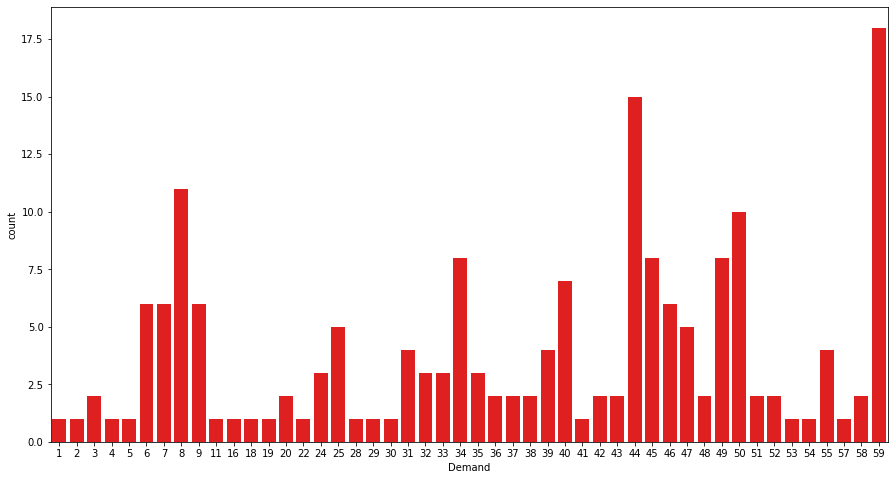

In [16]:
count_nulls = df_zone_4[['SKU', 'Demand']].copy()

# If Demand < 0 then = 0
count_nulls.loc[count_nulls.Demand < 0, 'Demand'] = 0

# Find all rows with null values from Demand
count_nulls = count_nulls.loc[count_nulls.Demand == 0, ['Demand', 'SKU']]

# Count the number of nulls from each SKU
count_nulls = count_nulls.groupby(['SKU'], as_index=False).count().sort_values(by=['Demand'], ascending=True)

plt.figure(figsize=(15,8))
sns.countplot(data=count_nulls, x='Demand', color='red')

In [17]:
def heatmap_skus_nulls(nulls_count, df):
    skus_less_than_x_nulls = count_nulls.loc[count_nulls.Demand < nulls_count, ['Demand', 'SKU']]['SKU'].to_list()

    heatmap = df[['Date', 'Demand', 'SKU']].copy()

    # If Demand < 0 then = 0
    heatmap.loc[heatmap.Demand < 0, 'Demand'] = 0
    heatmap.loc[heatmap.Demand > 0, 'Demand'] = 1

    heatmap = heatmap[heatmap['SKU'].isin(skus_less_than_x_nulls)]

    heatmap = pd.pivot(heatmap, index='SKU', columns='Date', values='Demand')

    plt.figure(figsize=(20,10))
    plt.title("SKUs with less than " + str(nulls_count) + " nulls")
    sns.heatmap(data=heatmap)

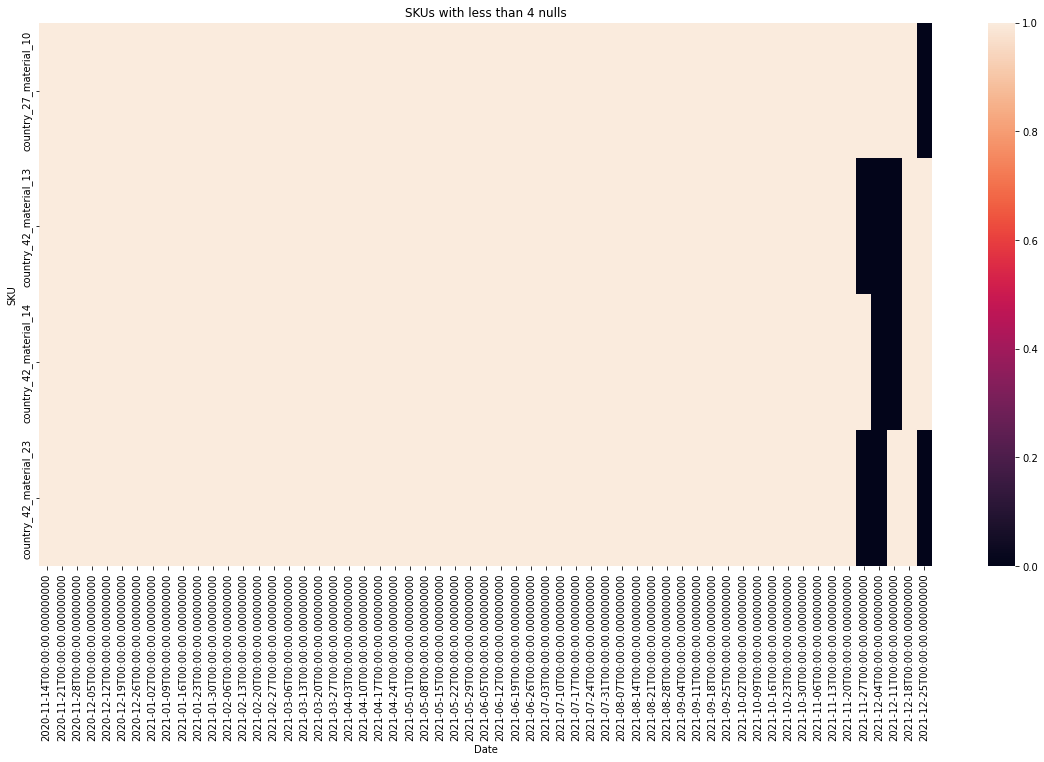

In [18]:
heatmap_skus_nulls(4, df_zone_4)

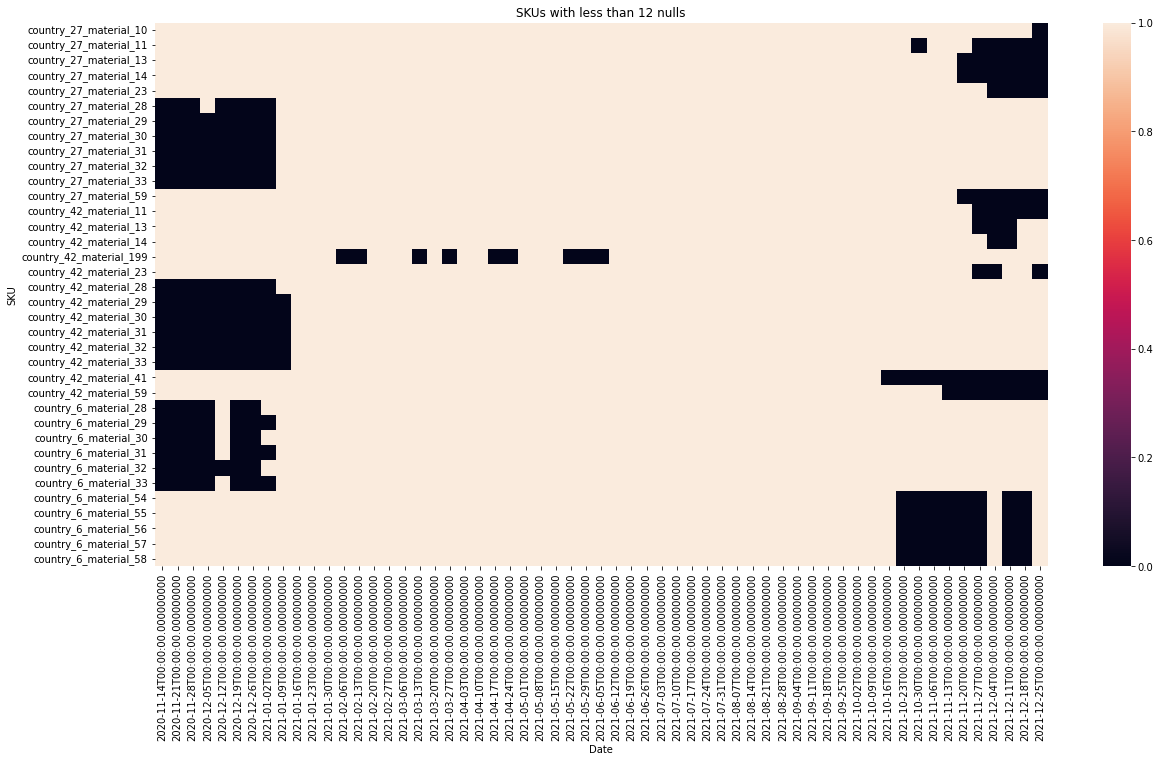

In [19]:
heatmap_skus_nulls(12, df_zone_4)

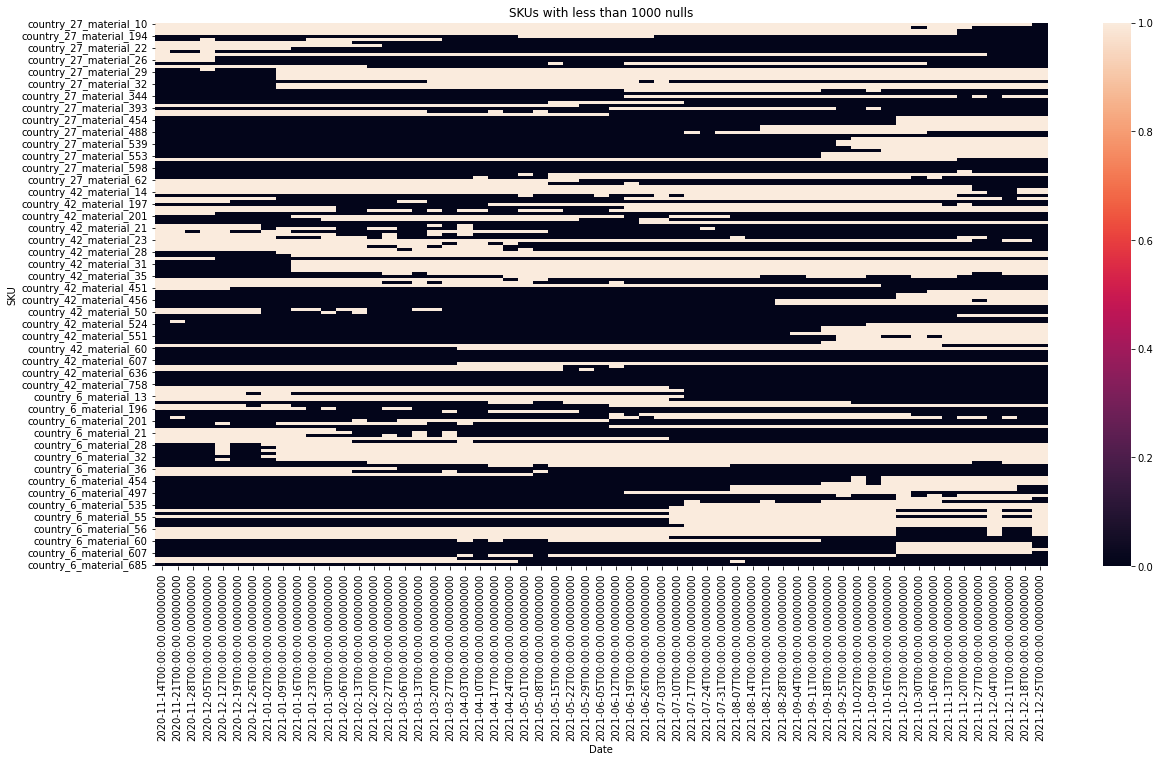

In [20]:
heatmap_skus_nulls(1000, df_zone_4)

In [21]:
all_sku_list = set(df_zone_4.SKU.to_list())
nulls_list = set(count_nulls['SKU'].to_list())
not_nulls_list = all_sku_list ^ nulls_list
info = dict()

for id in not_nulls_list:
    tmp = df_zone_4.loc[df_zone_4.SKU == id, ['Demand', 'SKU']]
    info[id] = [tmp.Demand.kurtosis(), tmp.Demand.std(), tmp.Demand.mean()]

df_stats = pd.DataFrame.from_dict(info).T.reset_index()
df_stats.columns = ['SKU', 'kurtosis', 'std', 'mean']
df_stats['Variance(%)'] = (df_stats['std'] / df_stats['mean'])*100
df_stats.sort_values(by=['Variance(%)'], ascending=True)

,SKU,kurtosis,std,mean,Variance(%)
26,country_42_material_19,-0.542785,92013.443523,5.828420e+05,15.787029
12,country_42_material_55,0.145048,34756.276367,1.932366e+05,17.986383
8,country_42_material_2,0.096748,69021.971934,3.604515e+05,19.148753
1,country_42_material_8,-0.479721,67285.320471,3.289464e+05,20.454795
49,country_42_material_20,-0.642719,167771.679132,7.970481e+05,21.049128
43,country_42_material_38,1.605888,48070.948151,2.253356e+05,21.333047
36,country_42_material_56,0.496800,34428.605181,1.558007e+05,22.097853
48,country_42_material_58,2.176724,78364.934440,3.539186e+05,22.142076
32,country_42_material_15,0.222399,343403.366949,1.545909e+06,22.213684
18,country_42_material_18,-0.381537,119498.793018,5.253519e+05,22.746430


### Feature engineering

In [22]:
df_zone_4_clean = df_zone_4
df_zone_4_clean = df_zone_4_clean.set_index('SKU')

Negative values: The approch used for negative values will be to replace them by zero values

In [23]:
df_zone_4_clean[df_zone_4_clean['Demand'] < 0]

,Country_Code,Material_Code,Date,Demand
SKU,,,,


In [24]:
df_zone_4_clean.loc[(df_zone_4_clean['Demand'] < 0), 'Demand'] = 0

Remove SKUs with all zeros

In [25]:
count_zeros = df_zone_4[['SKU', 'Demand']].copy()

In [26]:
demand_total_sum = count_zeros.groupby(by=['SKU']).sum()

In [27]:
null_skus = demand_total_sum[demand_total_sum['Demand'] == 0]

In [28]:
null_skus

,Demand
SKU,
country_27_material_343,0
country_27_material_346,0
country_27_material_515,0
country_27_material_596,0
country_27_material_597,0
country_27_material_598,0
country_42_material_46,0
country_42_material_514,0
country_42_material_604,0


In [29]:
null_skus = null_skus.reset_index()

In [30]:
df_zone_4_clean = df_zone_4_clean.drop(index=null_skus['SKU'].to_list())

Create features date related

In [31]:
df_zone_4_clean['year'] = df_zone_4_clean['Date'].dt.year
df_zone_4_clean['month'] = df_zone_4_clean['Date'].dt.month
df_zone_4_clean['week'] = df_zone_4_clean['Date'].dt.isocalendar().week

In [32]:
df_zone_4_clean

,Country_Code,Material_Code,Date,Demand,year,month,week
SKU,,,,,,,
country_6_material_1,6,1,2020-11-14,44880,2020,11,46
country_6_material_2,6,2,2020-11-14,161280,2020,11,46
country_6_material_8,6,8,2020-11-14,197280,2020,11,46
country_6_material_9,6,9,2020-11-14,346800,2020,11,46
country_6_material_10,6,10,2020-11-14,36240,2020,11,46
...,...,...,...,...,...,...,...
country_42_material_539,42,539,2021-12-25,336960,2021,12,51
country_42_material_543,42,543,2021-12-25,342240,2021,12,51
country_42_material_553,42,553,2021-12-25,116400,2021,12,51


In [33]:
df_temp = df_zone_4_clean
df_temp = df_temp.sort_values(by=["Country_Code", "Material_Code", "Date"])

In [34]:
number_of_consecutive_values = 4*4
df_temp['flag'] = df_temp.Demand.groupby([df_temp.Demand.diff().ne(0).cumsum()]).transform('size').ge(number_of_consecutive_values).astype(int) 

In [35]:
df_temp

,Country_Code,Material_Code,Date,Demand,year,month,week,flag
SKU,,,,,,,,
country_6_material_1,6,1,2020-11-14,44880,2020,11,46,0
country_6_material_1,6,1,2020-11-21,50400,2020,11,47,0
country_6_material_1,6,1,2020-11-28,83760,2020,11,48,0
country_6_material_1,6,1,2020-12-05,116400,2020,12,49,0
country_6_material_1,6,1,2020-12-12,94080,2020,12,50,0
...,...,...,...,...,...,...,...,...
country_42_material_553,42,553,2021-11-27,203760,2021,11,47,0
country_42_material_553,42,553,2021-12-04,208800,2021,12,48,0
country_42_material_553,42,553,2021-12-11,159360,2021,12,49,0


In [36]:
# df_temp = df_temp[df_temp["flag"] == 1].drop(columns=["Date"])
# df_temp = df_temp.drop_duplicates()
# df_temp = df_temp.drop(columns=["Demand", "flag"])

Create statistic based features

In [37]:
df_mean = df_zone_4[['Demand', 'SKU']].groupby('SKU').mean()
df_mean.rename(columns = {'Demand':'mean'}, inplace = True)

In [38]:
df_mean.shape

(231, 1)

In [39]:
df_std = df_zone_4[['Demand', 'SKU']].groupby('SKU').std()
df_std.rename(columns = {'Demand':'std'}, inplace = True)

In [40]:
df_std.shape

(231, 1)

In [41]:
df_zone_4_clean = df_zone_4_clean.join(df_mean)

In [42]:
df_zone_4_clean = df_zone_4_clean.join(df_std)

In [43]:
# Coefficient of variation
df_zone_4_clean['coef_var'] = df_zone_4_clean['mean']/df_zone_4_clean['std']

In [44]:
df_zone_4_clean

,Country_Code,Material_Code,Date,Demand,year,month,week,mean,std,coef_var
SKU,,,,,,,,,,
country_27_material_1,27,1,2020-11-14,22080,2020,11,46,10779.661017,4390.072643,2.455463
country_27_material_1,27,1,2020-11-21,10560,2020,11,47,10779.661017,4390.072643,2.455463
country_27_material_1,27,1,2020-11-28,9360,2020,11,48,10779.661017,4390.072643,2.455463
country_27_material_1,27,1,2020-12-05,14880,2020,12,49,10779.661017,4390.072643,2.455463
country_27_material_1,27,1,2020-12-12,6960,2020,12,50,10779.661017,4390.072643,2.455463
...,...,...,...,...,...,...,...,...,...,...
country_6_material_9,6,9,2021-11-27,383040,2021,11,47,301049.491525,81348.377544,3.700744
country_6_material_9,6,9,2021-12-04,448800,2021,12,48,301049.491525,81348.377544,3.700744
country_6_material_9,6,9,2021-12-11,291600,2021,12,49,301049.491525,81348.377544,3.700744


#### Detectar Outliers

In [45]:
resultdf = df_zone_4_clean

#### Create lags
* https://www.mikulskibartosz.name/forecasting-time-series-using-lag-features/

In [46]:
lag_number = 8

In [47]:
# X = []
# Y = []
df_lags = pd.DataFrame()
unique_ids = resultdf.index.unique()

for identifier in unique_ids:
    single_process_data = resultdf.loc[identifier] #1
    
    data = pd.DataFrame(single_process_data[['Demand']].copy()) #2
    data.columns = ['Demand'] #2

    # last x values of the target variable as "lag" variables (the most recent one is the dependent feature (y))
    for i in range(1, lag_number+1): #3
        data['Demand_lag_{}'.format(i)] = data['Demand'].shift(i)
    
    #rewrite constants
    data['Country_Code'] = single_process_data['Country_Code'] #5
    data['Material_Code'] = single_process_data['Material_Code'] #5
    data['year'] = single_process_data['year'] #5
    data['month'] = single_process_data['month'] #5
    data['week'] = single_process_data['week'] #5
    data['mean'] = single_process_data['mean'] #5
    data['std'] = single_process_data['std'] #5
    data['coef_var'] = single_process_data['std'] #5

    #the shift operations in the loops create many partial results. They are useless, and we don't want them
    data = data.dropna()
#     y = data['Demand'] #6
#     x = data.drop(['Demand'], axis=1) #6    
    
#     X.append(np.array(x).flatten()) #7
#     Y.append(y) #7
    df_lags = pd.concat([df_lags, data], ignore_index=True)

df_result_lags = df_lags

In [48]:
df_result_lags

,Demand,Demand_lag_1,Demand_lag_2,Demand_lag_3,Demand_lag_4,Demand_lag_5,Demand_lag_6,Demand_lag_7,Demand_lag_8,Country_Code,Material_Code,year,month,week,mean,std,coef_var
0,11520,3360.0,3120.0,6240.0,6960.0,14880.0,9360.0,10560.0,22080.0,27,1,2021,1,1,10779.661017,4390.072643,4390.072643
1,8640,11520.0,3360.0,3120.0,6240.0,6960.0,14880.0,9360.0,10560.0,27,1,2021,1,2,10779.661017,4390.072643,4390.072643
2,5520,8640.0,11520.0,3360.0,3120.0,6240.0,6960.0,14880.0,9360.0,27,1,2021,1,3,10779.661017,4390.072643,4390.072643
3,5760,5520.0,8640.0,11520.0,3360.0,3120.0,6240.0,6960.0,14880.0,27,1,2021,1,4,10779.661017,4390.072643,4390.072643
4,8640,5760.0,5520.0,8640.0,11520.0,3360.0,3120.0,6240.0,6960.0,27,1,2021,2,5,10779.661017,4390.072643,4390.072643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,383040,487680.0,245280.0,341760.0,180960.0,343440.0,208800.0,234000.0,249120.0,6,9,2021,11,47,301049.491525,81348.377544,81348.377544
10859,448800,383040.0,487680.0,245280.0,341760.0,180960.0,343440.0,208800.0,234000.0,6,9,2021,12,48,301049.491525,81348.377544,81348.377544
10860,291600,448800.0,383040.0,487680.0,245280.0,341760.0,180960.0,343440.0,208800.0,6,9,2021,12,49,301049.491525,81348.377544,81348.377544
10861,503040,291600.0,448800.0,383040.0,487680.0,245280.0,341760.0,180960.0,343440.0,6,9,2021,12,50,301049.491525,81348.377544,81348.377544


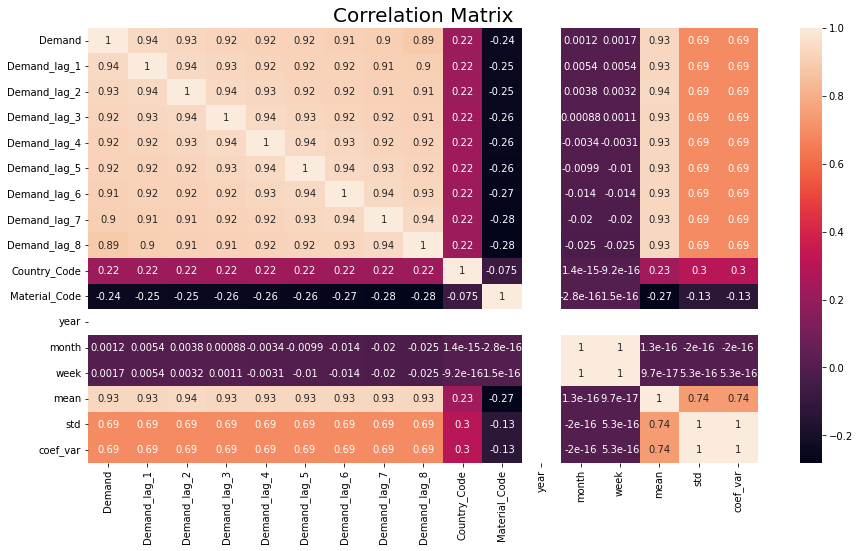

In [49]:
# Correlação entre features
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df_result_lags.corr(), annot = True)
plt.title('Correlation Matrix', fontsize = 20)
plt.show()